In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

In [3]:
df2 = df[df['compensation_leader_compensation'].isnull() == False]
org_type_dummies = pd.get_dummies(df2.org_type)
df2 = pd.concat([df2, org_type_dummies], axis=1, join = 'outer')
df2.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_type',
          'org_category', 'compensation_leader_title'], 
         axis = 1, inplace = True)
df2.head()

,accountability_score,administrative_expenses,compensation_leader_compensation,compensation_leader_expense_percent,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
X = df2[['accountability_score', 'financial_score',
         'overall_score', 'administrative_expenses',
         'excess_or_deficit_for_year', 'fundraising_expenses',
         'net_assets', 'other_revenue',
         'payments_to_affiliates', 'Animals',
         'Arts, Culture, Humanities', 'Community Development',
         'Education', 'Environment',
         'Health', 'Human Services',
         'Human and Civil Rights', 'International',
         'Religion', 'Research and Public Policy']]
y = df2['compensation_leader_compensation']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


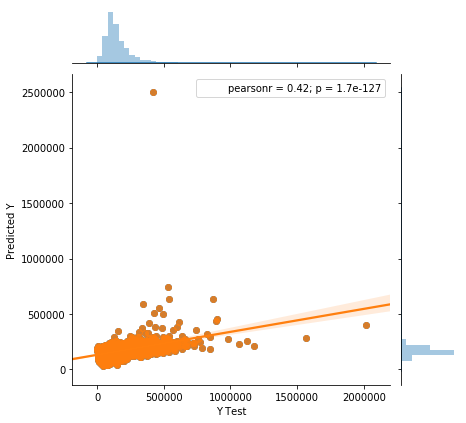

In [7]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'scatter');
ax.set_axis_labels('Y Test', 'Predicted Y')
ax.plot(sns.regplot, sns.distplot);

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


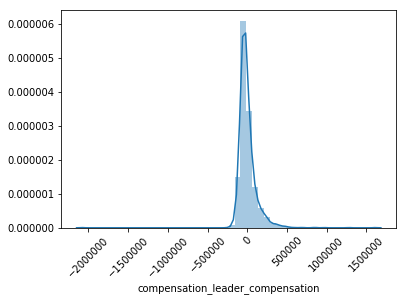

In [8]:
ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [9]:
cdf = pd.DataFrame(linreg.coef_, X.columns, columns = ['Coeficient'])
print('Intercept: \n', linreg.intercept_)
print(cdf)

Intercept: 
 -49257.38270579724
                              Coeficient
accountability_score         1826.351362
financial_score               639.494968
overall_score                -143.684141
administrative_expenses         0.005240
excess_or_deficit_for_year      0.000520
fundraising_expenses            0.000572
net_assets                      0.000006
other_revenue                   0.002446
payments_to_affiliates          0.042524
Animals                    -13465.682483
Arts, Culture, Humanities   34751.360024
Community Development      -20476.501716
Education                   13351.010698
Environment                -14727.316845
Health                      11490.032911
Human Services             -31874.542786
Human and Civil Rights       4321.197644
International               -4715.320260
Religion                   -42470.693227
Research and Public Policy  63816.456041


In [10]:
print('Train R^2:', linreg.score(X_train, y_train).round(4))
print('Test  R^2:', linreg.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2478
Test  R^2: 0.1754
MAE:       71913.7754
MSE:       13486831535.148
RMSE:      116132.8185


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [12]:
scaler = StandardScaler()
scaler.fit(df2.drop('compensation_leader_compensation', axis = 1))
scaled_features = scaler.transform(df2.drop('compensation_leader_compensation', axis = 1))
df_scaled_features = pd.DataFrame(scaled_features, 
                                  columns = df2.columns.drop('compensation_leader_compensation'))
df_scaled_features.head()

,accountability_score,administrative_expenses,compensation_leader_expense_percent,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,-0.263579,-0.186773,-0.181814,-0.047114,0.462148,-0.156168,-0.176026,-0.146236,0.330661,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,4.886773,-0.270780,-0.229912,-0.157289
1,-0.601692,-0.048412,-0.869707,0.022858,-0.004671,-0.165434,-0.099415,-0.103574,-0.157966,-0.075369,...,-0.417255,-0.327716,3.497212,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,-0.229912,-0.157289
2,-0.714396,-0.198450,-1.071041,-0.115813,-0.836696,-0.133811,-0.188129,-0.152597,-0.799611,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,-0.204634,3.693041,-0.229912,-0.157289
3,-0.601692,-0.156641,-1.159125,0.081865,1.160365,-0.111714,-0.118328,-0.163070,0.355093,-0.075369,...,-0.417255,-0.327716,3.497212,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,-0.229912,-0.157289
4,0.638054,-0.191633,0.782913,-0.085533,0.112034,-0.160089,-0.179602,-0.148440,0.442531,-0.075369,...,-0.417255,-0.327716,-0.285942,-0.230243,-0.334349,-0.635888,-0.204634,-0.270780,4.349486,-0.157289


In [13]:
X = df_scaled_features[['accountability_score', 'financial_score',
                        'overall_score', 'administrative_expenses',
                        'excess_or_deficit_for_year', 'fundraising_expenses',
                        'net_assets', 'other_revenue',
                        'payments_to_affiliates', 'Animals',
                        'Arts, Culture, Humanities', 'Community Development',
                        'Education', 'Environment',
                        'Health', 'Human Services',
                        'Human and Civil Rights', 'International',
                        'Religion', 'Research and Public Policy']]
y = df2['compensation_leader_compensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [34]:
ridge = Ridge(alpha = 1000)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


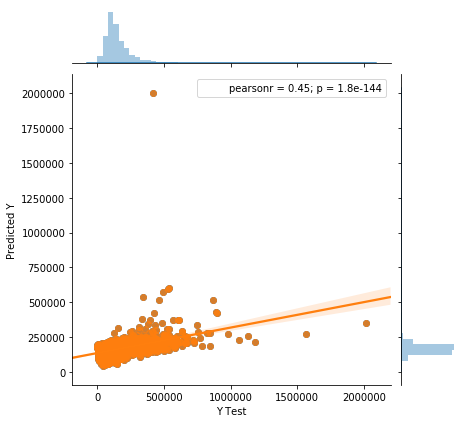

In [35]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'scatter');
ax.set_axis_labels('Y Test', 'Predicted Y')
ax.plot(sns.regplot, sns.distplot);

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


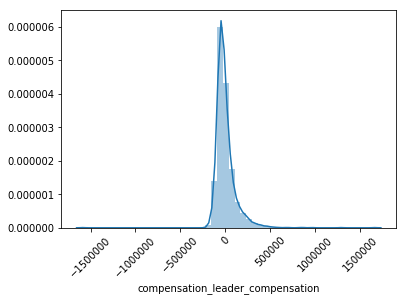

In [36]:
ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [37]:
cdf = pd.DataFrame(linreg.coef_, X.columns, columns = ['Coeficient'])
print('Intercept: \n', linreg.intercept_)
print(cdf)

Intercept: 
 -49257.38270579724
                              Coeficient
accountability_score         1826.351362
financial_score               639.494968
overall_score                -143.684141
administrative_expenses         0.005240
excess_or_deficit_for_year      0.000520
fundraising_expenses            0.000572
net_assets                      0.000006
other_revenue                   0.002446
payments_to_affiliates          0.042524
Animals                    -13465.682483
Arts, Culture, Humanities   34751.360024
Community Development      -20476.501716
Education                   13351.010698
Environment                -14727.316845
Health                      11490.032911
Human Services             -31874.542786
Human and Civil Rights       4321.197644
International               -4715.320260
Religion                   -42470.693227
Research and Public Policy  63816.456041


In [38]:
print('Train R^2:', ridge.score(X_train, y_train).round(4))
print('Test  R^2:', ridge.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2435
Test  R^2: 0.1996
MAE:       72240.4585
MSE:       13091957031.1756
RMSE:      114420.0902
